In [ ]:
# THIS CODE IS DONE DONT MAKE CHANGES IN IT  -----"Kvasir_Dataset_V3"-------

In [ ]:
# import pertinent libraries
import os
import datetime
import glob as glob
import numpy as np
from keras.models import Model, Sequential
from keras.layers import Input, Add, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_width, img_height = 224, 224

train_dir = '/content/drive/MyDrive/Data_Sets_of_abnormality_in_large_intestine/kvasir_dataset_v3/train'
validate_dir = '/content/drive/MyDrive/Data_Sets_of_abnormality_in_large_intestine/kvasir_dataset_v3/val'
test_dir = '/content/drive/MyDrive/Data_Sets_of_abnormality_in_large_intestine/kvasir_dataset_v3/test'
nb_epochs = 10
batch_size = 32
nb_classes = len(glob.glob(train_dir + '/*'))

# get number of images in training directory
nb_train_samples = 0
for r, dirs, files in os.walk(train_dir):
    for dr in dirs:
        nb_train_samples += len(glob.glob(os.path.join(r, dr + "/*")))
# get number of images in validation directory
nb_validate_samples = 0
for r, dirs, files in os.walk(validate_dir):
    for dr in dirs:
        nb_validate_samples += len(glob.glob(os.path.join(r, dr + "/*")))
# get the number of images in test directory
nb_test_samples = 0
for r, dirs, files in os.walk(test_dir):
    for dr in dirs:
        nb_test_samples += len(glob.glob(os.path.join(r, dr + "/*")))

In [ ]:
print(nb_classes)

14


In [ ]:
# Data preprocessing for training
train_datagen =  ImageDataGenerator(
    rotation_range = 20,
    fill_mode = 'nearest',
    horizontal_flip = True)

In [ ]:
# data pre-processing for validation
validate_datagen =  ImageDataGenerator(
    rotation_range = 20,
    fill_mode = 'nearest',
    horizontal_flip = True)

In [ ]:
# data pre-processing for testing
test_datagen =  ImageDataGenerator(
    rotation_range = 20,
    fill_mode = 'nearest',
    horizontal_flip = True)

In [ ]:
# generate and store training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size)

Found 5309 images belonging to 14 classes.


In [ ]:
# generate and store validation data
validate_generator = validate_datagen.flow_from_directory(
    validate_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size)

Found 713 images belonging to 14 classes.


In [ ]:
# generate and store test data
test_generator = validate_datagen.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size)

Found 735 images belonging to 14 classes.


In [ ]:
# building model
resnet_50_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=8,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_50_model.add(pretrained_model)
resnet_50_model.add(Flatten())
resnet_50_model.add(Dense(512, activation='relu'))
resnet_50_model.add(Dropout(0.5))
resnet_50_model.add(Dense(14, activation='softmax'))   # making flatten vector

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_50_model.compile(Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
resnet_50_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 14)                7182      
                                                                 
Total params: 24,643,982
Trainable params: 1,056,270
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
# fit the model, log the results and the training time
now = datetime.datetime.now
t = now()
history = resnet_50_model.fit_generator( 
    train_generator,
    epochs = nb_epochs,
    steps_per_epoch = nb_train_samples//batch_size,
    validation_data = validate_generator,
    validation_steps = nb_validate_samples//batch_size)
print('Training time: %s' % (now() - t))

<ipython-input-16-71bbc5fb8195>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = resnet_50_model.fit_generator(


Epoch 1/10
165/165 [==============================] - 1120s 7s/step - loss: 0.2256 - accuracy: 0.9272 - val_loss: 0.4415 - val_accuracy: 0.8523
Epoch 2/10
165/165 [==============================] - 1067s 6s/step - loss: 0.2078 - accuracy: 0.9299 - val_loss: 0.4102 - val_accuracy: 0.8864
Epoch 3/10
165/165 [==============================] - 1065s 6s/step - loss: 0.2115 - accuracy: 0.9310 - val_loss: 0.4141 - val_accuracy: 0.8778
Epoch 4/10
165/165 [==============================] - 1065s 6s/step - loss: 0.1982 - accuracy: 0.9322 - val_loss: 0.4391 - val_accuracy: 0.8736
Epoch 5/10
165/165 [==============================] - 1064s 6s/step - loss: 0.1831 - accuracy: 0.9413 - val_loss: 0.4158 - val_accuracy: 0.8793
Epoch 6/10
165/165 [==============================] - 1065s 6s/step - loss: 0.1930 - accuracy: 0.9329 - val_loss: 0.4065 - val_accuracy: 0.8807
Epoch 7/10
165/165 [==============================] - 1063s 6s/step - loss: 0.1734 - accuracy: 0.9414 - val_loss: 0.4155 - val_accuracy:

In [ ]:
model = resnet_50_model.save("ResNet50_Kvasir_V3.h5")

In [ ]:
from keras import models
model = models.load_model("ResNet50_Kvasir_V3.h5")

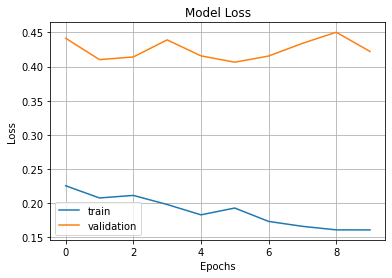

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.grid()
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "validation"])
plt.show()

In [ ]:
X_test, Y_test = next(test_generator)

In [ ]:
print(X_test,Y_test)

[[[[3.00000000e+00 3.00000000e+00 3.00000000e+00]
   [3.00000000e+00 3.00000000e+00 3.00000000e+00]
   [3.00000000e+00 3.00000000e+00 3.00000000e+00]
   ...
   [1.00000000e+00 1.00000000e+00 1.00000000e+00]
   [1.00000000e+00 1.00000000e+00 1.00000000e+00]
   [1.00000000e+00 1.00000000e+00 1.00000000e+00]]

  [[3.00000000e+00 3.00000000e+00 3.00000000e+00]
   [3.00000000e+00 3.00000000e+00 3.00000000e+00]
   [3.00000000e+00 3.00000000e+00 3.00000000e+00]
   ...
   [1.00000000e+00 1.00000000e+00 1.00000000e+00]
   [1.00000000e+00 1.00000000e+00 1.00000000e+00]
   [1.00000000e+00 1.00000000e+00 1.00000000e+00]]

  [[3.00000000e+00 3.00000000e+00 3.00000000e+00]
   [3.00000000e+00 3.00000000e+00 3.00000000e+00]
   [3.00000000e+00 3.00000000e+00 3.00000000e+00]
   ...
   [1.00000000e+00 1.00000000e+00 1.00000000e+00]
   [1.00000000e+00 1.00000000e+00 1.00000000e+00]
   [1.00000000e+00 1.00000000e+00 1.00000000e+00]]

  ...

  [[6.70000000e+01 1.39000000e+02 1.27000000e+02]
   [6.70000000e+

In [ ]:
y_true=[]
for i in range(len(Y_test)):
    K= Y_test[i]
    
    y_true.append(list(K).index(max(list(K))))

In [ ]:
print(y_true)

[1, 13, 1, 6, 6, 4, 3, 0, 1, 0, 1, 2, 3, 3, 2, 7, 8, 0, 1, 1, 7, 6, 3, 3, 4, 3, 3, 4, 9, 4, 3, 0]


In [ ]:
M = resnet_50_model.predict(X_test)
X_t=[]
for i in range(len(M)):
    K= M[i]
    X_t.append(list(K).index(max(list(K))))

1/1 [==============================] - 7s 7s/step


In [ ]:
print(X_t)

[1, 0, 1, 6, 6, 4, 3, 0, 1, 0, 1, 2, 3, 3, 2, 7, 2, 0, 1, 1, 7, 7, 3, 3, 4, 3, 3, 3, 2, 4, 3, 0]


In [ ]:
print(classification_report(y_true, X_t, zero_division = 0))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      1.00      1.00         6
           2       0.50      1.00      0.67         2
           3       0.89      1.00      0.94         8
           4       1.00      0.75      0.86         4
           6       1.00      0.67      0.80         3
           7       0.67      1.00      0.80         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1

    accuracy                           0.84        32
   macro avg       0.59      0.64      0.60        32
weighted avg       0.80      0.84      0.81        32



In [ ]:
print(confusion_matrix(y_true,X_t))

[[4 0 0 0 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0]
 [0 0 0 1 3 0 0 0 0 0]
 [0 0 0 0 0 2 1 0 0 0]
 [0 0 0 0 0 0 2 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]
